# Dependencies and Setup

In [1]:
import pandas as pd
from datetime import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
# Read from csv 
drug_related_deaths_df = pd.read_csv('Accidental_Drug_Related_Deaths_2012-2018 (2).csv')

In [3]:
# Removing unnecessary columns
narrowed_df = drug_related_deaths_df.loc[:,['ID','Date','Age','Sex','Race','DeathCity','DeathCityGeo','COD','Heroin','Cocaine','Fentanyl','FentanylAnalogue','Oxycodone','Oxymorphone','Ethanol','Hydrocodone','Benzodiazepine','Methadone','Amphet','Tramad','Morphine_NotHeroin','Hydromorphone','Other','OpiateNOS','AnyOpioid']]

# Drop records without Age, Sex and Race entry
narrowed_df = narrowed_df.dropna(subset=['Age', 'Sex','Race'], how='all')

# Fill Nan values by N
narrowed_df.update(narrowed_df[['Heroin','Cocaine','Fentanyl','FentanylAnalogue','Oxycodone','Oxymorphone','Ethanol','Hydrocodone','Benzodiazepine','Methadone','Amphet','Tramad','Morphine_NotHeroin','Hydromorphone','Other','OpiateNOS','AnyOpioid']].fillna('N'))

# Convert date column to Datetime object
narrowed_df['Date'] = pd.to_datetime(narrowed_df['Date'])
narrowed2_df = narrowed_df.copy()
narrowed3_df = narrowed_df.copy() 
narrowed_df

,ID,Date,Age,Sex,Race,DeathCity,DeathCityGeo,COD,Heroin,Cocaine,...,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
1,13-0102,2013-03-21,48.0,Male,Black,NORWALK,"Norwalk, CT\n(41.11805, -73.412906)",Cocaine Intoxication,N,Y,...,N,N,N,N,N,N,N,N,N,N
2,16-0165,2016-03-13,30.0,Female,White,DANBURY,"Danbury, CT\n(41.393666, -73.451539)",Acute Heroin and Cocaine Intoxication,Y,Y,...,N,N,N,N,N,N,N,N,N,Y
3,16-0208,2016-03-31,23.0,Male,White,GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Acute Fentanyl and Morphine Intoxication,Y,N,...,N,N,N,N,N,N,N,N,N,Y
4,13-0052,2013-02-13,22.0,Male,"Asian, Other",GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Fentanyl Intoxication,N,N,...,N,N,N,N,N,N,N,N,N,N
5,14-0277,2014-06-29,23.0,Male,White,BRISTOL,"BRISTOL, CT\n(41.673037, -72.945791)",Heroin Intoxication,Y,N,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,15-0466,2015-09-08,43.0,Male,White,CHESHIRE,"CHESHIRE, CT\n(41.498834, -72.901448)",Acute Intoxication due to the Combined Effects...,N,N,...,N,Y,N,N,N,N,N,N,N,N
5101,17-0618,2017-07-22,21.0,Male,White,NEW HAVEN,"New Haven, CT\n(41.308252, -72.924161)","Multidrug Toxicity Including Heroin, Alprazola...",Y,N,...,N,Y,N,N,N,N,N,N,N,N
5102,18-0646,2018-08-14,30.0,Male,White,DANBURY,"DANBURY, CT\n(41.393666, -73.451539)","Multidrug Toxicity Including Heroin, Fentanyl,...",Y,N,...,N,N,N,N,Y,N,N,N,N,Y
5103,14-0124,2014-03-16,33.0,Male,White,WINDSOR,"WINDSOR, CT\n(41.852781, -72.64379)",Acute Fentanyl intoxication,N,N,...,N,N,N,N,N,N,N,N,N,N


In [4]:
# Get count of deaths in each month
narrowed_df.index = pd.to_datetime(narrowed_df['Date'],format='%m/%d/%y %I:%M%p')
narrowed_df = narrowed_df.groupby(by=[narrowed_df.index.year,narrowed_df.index.month]).agg({'ID':'count'})
narrowed_df.head()

ID
Date   Date    
2012.0 1.0   31
       2.0   27
       3.0   24
       4.0   30
       5.0   28

In [5]:
# Create new dataframe with year,month and day concatenated
reduced_df = pd.DataFrame(columns=['Month', 'Deaths Per Month'])
for index, row in narrowed_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    reduced_df = reduced_df.append({'Month': converted_date, 'Deaths Per Month': count}, ignore_index=True)  

In [6]:
# Set index as month to plot Deaths per month chart
reduced_df.set_index('Month', inplace=True)
reduced_df.head()

,Deaths Per Month
Month,
2012-01-01,31
2012-02-01,27
2012-03-01,24
2012-04-01,30
2012-05-01,28


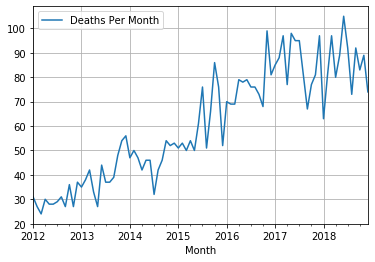

In [7]:
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

reduced_df[(start_date <= reduced_df.index) & (reduced_df.index <= end_date)].plot(grid='on')

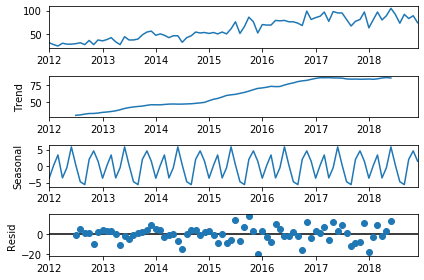

In [8]:
decomposition = sm.tsa.seasonal_decompose(reduced_df,model='additive')
fig = decomposition.plot()

In [9]:
drugnames = list(narrowed2_df.columns[8:23])

In [10]:
# Declaring an empty list
totalvalue = []

In [11]:
# This loop will pick the drug column name and iterates through dat frame. 
# The summation counter increments if the value of each cell is not N. 
for drug in drugnames:
    counter = 0
    for index , value in narrowed2_df.iterrows():
        if(narrowed2_df.at[index,drug] != 'N'):
            counter = counter + 1
    totalvalue.append(counter)

([<matplotlib.axis.XTick at 0x1d70a4a6548>,
 <a list of 15 Text xticklabel objects>)

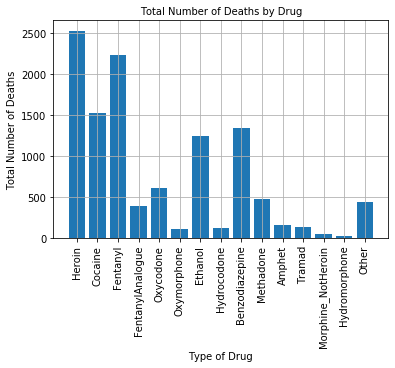

In [57]:
# Plotting the results on a scatter plot. 
plt.bar(drugnames,totalvalue)
plt.xlabel('Type of Drug',fontsize = 10)
plt.ylabel('Total Number of Deaths',fontsize = 10)
plt.title('Total Number of Deaths by Drug', fontsize = 10)
plt.grid(True)
plt.xticks(drugnames, drugnames, rotation='vertical')

In [14]:
narrowed2_df.index = pd.to_datetime(narrowed2_df['Date'],format='%m/%d/%y %I:%M%p')

Text(0, 0.5, 'Deaths')

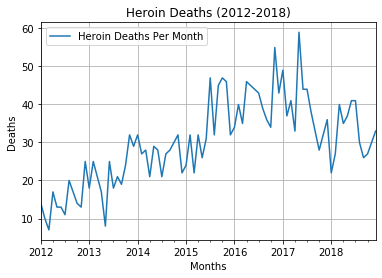

In [51]:
Heroin = narrowed2_df.loc[(narrowed2_df["Heroin"] == "Y")]
heroin_df = Heroin.groupby(by=[Heroin.index.year,Heroin.index.month]).agg({'Heroin':'count'})
# # Create new dataframe with year,month and day concatenated
reduced_df = pd.DataFrame(columns=['Month', 'Heroin Deaths Per Month'])
for index, row in heroin_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    reduced_df = reduced_df.append({'Month': converted_date, 'Heroin Deaths Per Month': count}, ignore_index=True) 
# Set index as month to plot Deaths per month chart
reduced_df.set_index('Month', inplace=True)
reduced_df.head()
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

reduced_df[(start_date <= reduced_df.index) & (reduced_df.index <= end_date)].plot(grid='on')
plt.title("Heroin Deaths (2012-2018)")
plt.xlabel("Months")
plt.ylabel("Deaths")

Text(0, 0.5, 'Deaths')

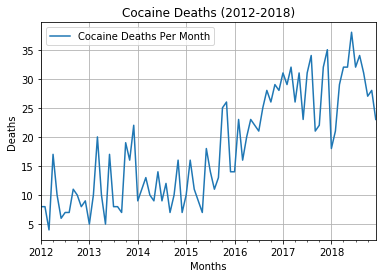

In [53]:
Cocaine = narrowed2_df.loc[(narrowed2_df["Cocaine"] == "Y")]
cocaine_df = Cocaine.groupby(by=[Cocaine.index.year,Cocaine.index.month]).agg({'Cocaine':'count'})
# Create new dataframe with year,month and day concatenated
reduced_df = pd.DataFrame(columns=['Month', 'Cocaine Deaths Per Month'])
for index, row in cocaine_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    reduced_df = reduced_df.append({'Month': converted_date, 'Cocaine Deaths Per Month': count}, ignore_index=True) 
# Set index as month to plot Deaths per month chart
reduced_df.set_index('Month', inplace=True)
reduced_df.head()
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

reduced_df[(start_date <= reduced_df.index) & (reduced_df.index <= end_date)].plot(grid='on')
plt.title("Cocaine Deaths (2012-2018)")
plt.xlabel("Months")
plt.ylabel("Deaths")

Text(0, 0.5, 'Deaths')

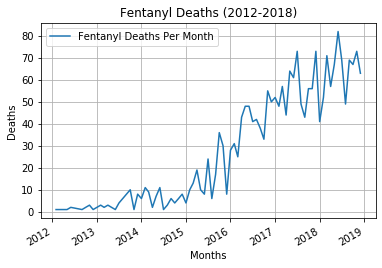

In [54]:
Fentanyl = narrowed2_df.loc[(narrowed2_df["Fentanyl"] == "Y")]
fentanyl_df = Fentanyl.groupby(by=[Fentanyl.index.year,Fentanyl.index.month]).agg({'Fentanyl':'count'})
# Create new dataframe with year,month and day concatenated
reduced_df = pd.DataFrame(columns=['Month', 'Fentanyl Deaths Per Month'])
for index, row in fentanyl_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    reduced_df = reduced_df.append({'Month': converted_date, 'Fentanyl Deaths Per Month': count}, ignore_index=True) 
# Set index as month to plot Deaths per month chart
reduced_df.set_index('Month', inplace=True)
reduced_df.head()
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

reduced_df[(start_date <= reduced_df.index) & (reduced_df.index <= end_date)].plot(grid='on')
plt.title("Fentanyl Deaths (2012-2018)")
plt.xlabel("Months")
plt.ylabel("Deaths")

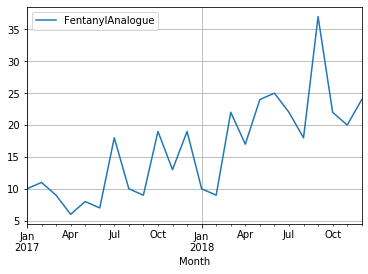

In [18]:
FentanylAnalogue = narrowed2_df.loc[(narrowed2_df["FentanylAnalogue"] == "Y")]
fentanylanalogue_df = FentanylAnalogue.groupby(by=[FentanylAnalogue.index.year,FentanylAnalogue.index.month]).agg({'FentanylAnalogue':'count'})
# fentanylanalogue_df
# Create new dataframe with year,month and day concatenated
reduced_df = pd.DataFrame(columns=['Month', 'FentanylAnalogue'])
for index, row in fentanylanalogue_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    reduced_df = reduced_df.append({'Month': converted_date, 'FentanylAnalogue': count}, ignore_index=True) 
# Set index as month to plot Deaths per month chart
reduced_df.set_index('Month', inplace=True)
reduced_df.head()
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

reduced_df[(start_date <= reduced_df.index) & (reduced_df.index <= end_date)].plot(grid='on')

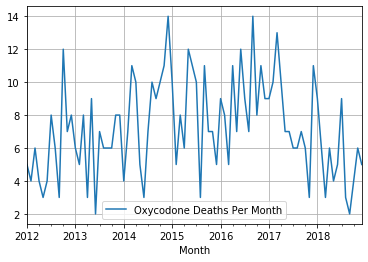

In [19]:
Oxycodone = narrowed2_df.loc[(narrowed2_df["Oxycodone"] == "Y")]
oxycodone_df = Oxycodone.groupby(by=[Oxycodone.index.year,Oxycodone.index.month]).agg({'Oxycodone':'count'})
# Create new dataframe with year,month and day concatenated
reduced_df = pd.DataFrame(columns=['Month', 'Oxycodone Deaths Per Month'])
for index, row in oxycodone_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    reduced_df = reduced_df.append({'Month': converted_date, 'Oxycodone Deaths Per Month': count}, ignore_index=True) 
# Set index as month to plot Deaths per month chart
reduced_df.set_index('Month', inplace=True)
reduced_df.head()
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

reduced_df[(start_date <= reduced_df.index) & (reduced_df.index <= end_date)].plot(grid='on')


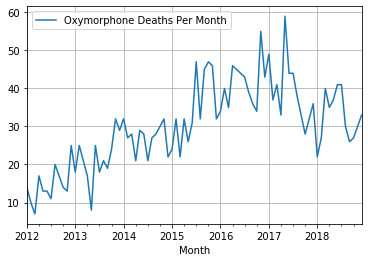

In [20]:
Oxymorphone = narrowed2_df.loc[(narrowed2_df["Oxymorphone"] == "Y")]
oxymorphone_df = Oxymorphone.groupby(by=[Oxymorphone.index.year,Oxymorphone.index.month]).agg({'Oxymorphone':'count'})
# Create new dataframe with year,month and day concatenated
reduced_df = pd.DataFrame(columns=['Month', 'Oxymorphone Deaths Per Month'])
for index, row in heroin_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    reduced_df = reduced_df.append({'Month': converted_date, 'Oxymorphone Deaths Per Month': count}, ignore_index=True) 
# Set index as month to plot Deaths per month chart
reduced_df.set_index('Month', inplace=True)
reduced_df.head()
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

reduced_df[(start_date <= reduced_df.index) & (reduced_df.index <= end_date)].plot(grid='on')

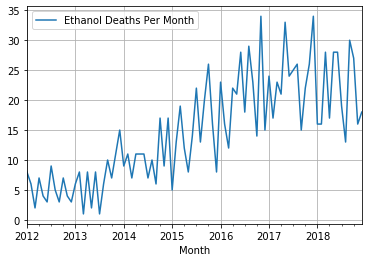

In [21]:
Ethanol = narrowed2_df.loc[(narrowed2_df["Ethanol"] == "Y")]
ethanol_df = Ethanol.groupby(by=[Ethanol.index.year,Ethanol.index.month]).agg({'Ethanol':'count'})
# Create new dataframe with year,month and day concatenated
reduced_df = pd.DataFrame(columns=['Month', 'Ethanol Deaths Per Month'])
for index, row in ethanol_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    reduced_df = reduced_df.append({'Month': converted_date, 'Ethanol Deaths Per Month': count}, ignore_index=True) 
# Set index as month to plot Deaths per month chart
reduced_df.set_index('Month', inplace=True)
reduced_df.head()
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

reduced_df[(start_date <= reduced_df.index) & (reduced_df.index <= end_date)].plot(grid='on')

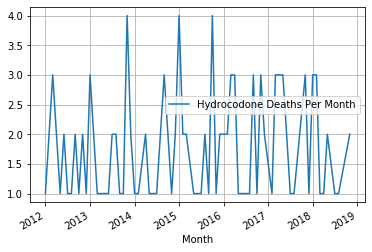

In [22]:
Hydrocodone = narrowed2_df.loc[(narrowed2_df["Hydrocodone"] == "Y")]
hydrocodone_df = Hydrocodone.groupby(by=[Hydrocodone.index.year,Hydrocodone.index.month]).agg({'Hydrocodone':'count'})
# Create new dataframe with year,month and day concatenated
reduced_df = pd.DataFrame(columns=['Month', 'Hydrocodone Deaths Per Month'])
for index, row in hydrocodone_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    reduced_df = reduced_df.append({'Month': converted_date, 'Hydrocodone Deaths Per Month': count}, ignore_index=True) 
# Set index as month to plot Deaths per month chart
reduced_df.set_index('Month', inplace=True)
reduced_df.head()
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

reduced_df[(start_date <= reduced_df.index) & (reduced_df.index <= end_date)].plot(grid='on')

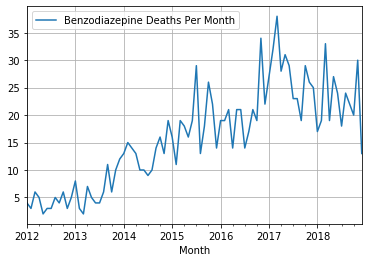

In [23]:
Benzodiazepine = narrowed2_df.loc[(narrowed2_df["Benzodiazepine"] == "Y")]
benzodiazepine_df = Benzodiazepine.groupby(by=[Benzodiazepine.index.year,Benzodiazepine.index.month]).agg({'Benzodiazepine':'count'})
# Create new dataframe with year,month and day concatenated
reduced_df = pd.DataFrame(columns=['Month', 'Benzodiazepine Deaths Per Month'])
for index, row in benzodiazepine_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    reduced_df = reduced_df.append({'Month': converted_date, 'Benzodiazepine Deaths Per Month': count}, ignore_index=True) 
# Set index as month to plot Deaths per month chart
reduced_df.set_index('Month', inplace=True)
reduced_df.head()
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

reduced_df[(start_date <= reduced_df.index) & (reduced_df.index <= end_date)].plot(grid='on')

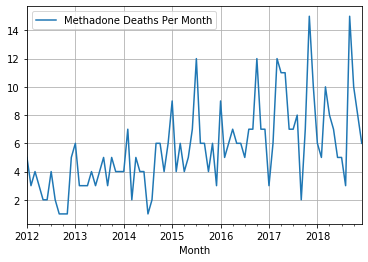

In [24]:
Methadone = narrowed2_df.loc[(narrowed2_df["Methadone"] == "Y")]
methadone_df = Methadone.groupby(by=[Methadone.index.year,Methadone.index.month]).agg({'Methadone':'count'})
# Create new dataframe with year,month and day concatenated
reduced_df = pd.DataFrame(columns=['Month', 'Methadone Deaths Per Month'])
for index, row in methadone_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    reduced_df = reduced_df.append({'Month': converted_date, 'Methadone Deaths Per Month': count}, ignore_index=True) 
# Set index as month to plot Deaths per month chart
reduced_df.set_index('Month', inplace=True)
reduced_df.head()
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

reduced_df[(start_date <= reduced_df.index) & (reduced_df.index <= end_date)].plot(grid='on')

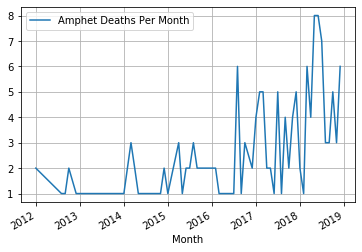

In [25]:
Amphet = narrowed2_df.loc[(narrowed2_df["Amphet"] == "Y")]
amphet_df = Amphet.groupby(by=[Amphet.index.year,Amphet.index.month]).agg({'Amphet':'count'})
# Create new dataframe with year,month and day concatenated
reduced_df = pd.DataFrame(columns=['Month', 'Amphet Deaths Per Month'])
for index, row in amphet_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    reduced_df = reduced_df.append({'Month': converted_date, 'Amphet Deaths Per Month': count}, ignore_index=True) 
# Set index as month to plot Deaths per month chart
reduced_df.set_index('Month', inplace=True)
reduced_df.head()
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

reduced_df[(start_date <= reduced_df.index) & (reduced_df.index <= end_date)].plot(grid='on')

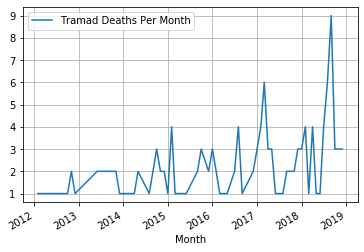

In [26]:
Tramad = narrowed2_df.loc[(narrowed2_df["Tramad"] == "Y")]
tramad_df = Tramad.groupby(by=[Tramad.index.year,Tramad.index.month]).agg({'Tramad':'count'})
# Create new dataframe with year,month and day concatenated
reduced_df = pd.DataFrame(columns=['Month', 'Tramad Deaths Per Month'])
for index, row in tramad_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    reduced_df = reduced_df.append({'Month': converted_date, 'Tramad Deaths Per Month': count}, ignore_index=True) 
# Set index as month to plot Deaths per month chart
reduced_df.set_index('Month', inplace=True)
reduced_df.head()
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

reduced_df[(start_date <= reduced_df.index) & (reduced_df.index <= end_date)].plot(grid='on')

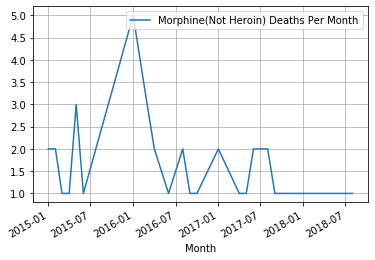

In [27]:
Morphine_NotHeroin = narrowed2_df.loc[(narrowed2_df["Morphine_NotHeroin"] == "Y")]
morphine_NotHeroin_df = Morphine_NotHeroin.groupby(by=[Morphine_NotHeroin.index.year,Morphine_NotHeroin.index.month]).agg({'Morphine_NotHeroin':'count'})
# Create new dataframe with year,month and day concatenated
reduced_df = pd.DataFrame(columns=['Month', 'Morphine(Not Heroin) Deaths Per Month'])
for index, row in morphine_NotHeroin_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    reduced_df = reduced_df.append({'Month': converted_date, 'Morphine(Not Heroin) Deaths Per Month': count}, ignore_index=True) 
# Set index as month to plot Deaths per month chart
reduced_df.set_index('Month', inplace=True)
reduced_df.head()
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

reduced_df[(start_date <= reduced_df.index) & (reduced_df.index <= end_date)].plot(grid='on')

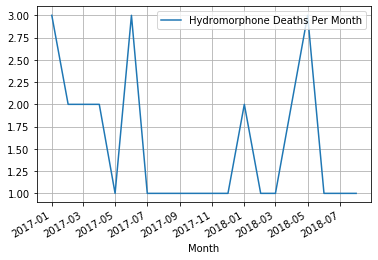

In [28]:
Hydromorphone = narrowed2_df.loc[(narrowed2_df["Hydromorphone"] == "Y")]
hydromorphone_df = Hydromorphone.groupby(by=[Hydromorphone.index.year,Hydromorphone.index.month]).agg({'Hydromorphone':'count'})
# Create new dataframe with year,month and day concatenated
reduced_df = pd.DataFrame(columns=['Month', 'Hydromorphone Deaths Per Month'])
for index, row in hydromorphone_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    reduced_df = reduced_df.append({'Month': converted_date, 'Hydromorphone Deaths Per Month': count}, ignore_index=True) 
# Set index as month to plot Deaths per month chart
reduced_df.set_index('Month', inplace=True)
reduced_df.head()
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

reduced_df[(start_date <= reduced_df.index) & (reduced_df.index <= end_date)].plot(grid='on')

In [36]:
frames = [heroin_df, cocaine_df, fentanyl_df, fentanylanalogue_df, oxycodone_df, oxymorphone_df, ethanol_df, hydrocodone_df, benzodiazepine_df, methadone_df, amphet_df, tramad_df, morphine_NotHeroin_df, hydromorphone_df]

In [40]:
result = pd.concat(frames, axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
result.head(25)

Heroin  Cocaine  Fentanyl  FentanylAnalogue  Oxycodone  \
Date Date                                                           
2012 1       14.0      NaN       NaN               NaN        NaN   
     2       10.0      NaN       NaN               NaN        NaN   
     3        7.0      NaN       NaN               NaN        NaN   
     4       17.0      NaN       NaN               NaN        NaN   
     5       13.0      NaN       NaN               NaN        NaN   
     6       13.0      NaN       NaN               NaN        NaN   
     7       11.0      NaN       NaN               NaN        NaN   
     8       20.0      NaN       NaN               NaN        NaN   
     9       17.0      NaN       NaN               NaN        NaN   
     10      14.0      NaN       NaN               NaN        NaN   
     11      13.0      NaN       NaN               NaN        NaN   
     12      25.0      NaN       NaN               NaN        NaN   
2013 1       18.0      NaN       NaN               NaN        NaN   
     2       25.0      NaN       NaN               NaN        NaN   
     3       21.0      NaN       NaN               NaN        NaN   
     4       17.0      NaN       NaN               NaN        NaN   
     5        8.0      NaN       NaN               NaN        NaN   
     6       25.0      NaN       NaN               NaN        NaN   
     7       18.0      NaN       NaN               NaN        NaN   
     8       21.0      NaN       NaN               NaN        NaN   
     9       19.0      NaN       NaN               NaN        NaN   
     10      24.0      NaN       NaN               NaN        NaN   
     11      32.0      NaN       NaN               NaN        NaN   
     12      29.0      NaN       NaN               NaN        NaN   
2014 1       32.0      NaN       NaN               NaN        NaN   

           Oxymorphone  Ethanol  Hydrocodone  Benzodiazepine  Methadone  \
Date Date                                                                 
2012 1             NaN      NaN          NaN             NaN        NaN   
     2             NaN      NaN          NaN             NaN        NaN   
     3             NaN      NaN          NaN             NaN        NaN   
     4             NaN      NaN          NaN             NaN        NaN   
     5             NaN      NaN          NaN             NaN        NaN   
     6             NaN      NaN          NaN             NaN        NaN   
     7             NaN      NaN          NaN             NaN        NaN   
     8             NaN      NaN          NaN             NaN        NaN   
     9             NaN      NaN          NaN             NaN        NaN   
     10            NaN      NaN          NaN             NaN        NaN   
     11            NaN      NaN          NaN             NaN        NaN   
     12            NaN      NaN          NaN             NaN        NaN   
2013 1             NaN      NaN          NaN             NaN        NaN   
     2             NaN      NaN          NaN             NaN        NaN   
     3             NaN      NaN          NaN             NaN        NaN   
     4             NaN      NaN          NaN             NaN        NaN   
     5             NaN      NaN          NaN             NaN        NaN   
     6             NaN      NaN          NaN             NaN        NaN   
     7             NaN      NaN          NaN             NaN        NaN   
     8             NaN      NaN          NaN             NaN        NaN   
     9             NaN      NaN          NaN             NaN        NaN   
     10            NaN      NaN          NaN             NaN        NaN   
     11            NaN      NaN          NaN             NaN        NaN   
     12            NaN      NaN          NaN             NaN        NaN   
2014 1             NaN      NaN          NaN             NaN        NaN   

           Amphet  Tramad  Morphine_NotHeroin  Hydromorphone  
Date Date                                                 